## |----------------------------------------------|Customer Segmentation|-----------------------------------------------|

1: Segment the customers through Unsupervised Learning using CLustering.

2: After segmenting the customers into appropriate clusters or labels, using Supervised Learning Train the model using train dataset and predict on the test dataset.

3: Extracting the patterns inorder to understand the customer behaviour.

##### Importing the Libraries 

In [1]:
import os

import pandas as pd

import numpy as np

##### Importing the csv files and reading the files using pandas library 

In [2]:
train_transaction = pd.read_csv('ExistingCustomersTransactionsData.csv')

In [3]:
train_demographic = pd.read_csv('ExisitngCustomerDemographics.csv')

In [4]:
test_transaction = pd.read_csv('NewCustomerTransactions_Segmentation.csv')

In [5]:
test_demographic = pd.read_csv('NewCustomerDemographics_Segmentation.csv')

## Step :- 1
### Exploratory Data Analysis 

##Here we have four datasets, they are 'train_transaction', 'train_demographic', 'test_transaction', 'test_demographic'.

1: Checking the head and tail of each dataset. This will help us understand the features present in the dataset

2: Checking the shape of each dataset.


#### Checking the head and tail of each dataset.

In [6]:
train_transaction.head()

,BillNumber,BillDate,CustomerID,ProductID,ProductCategory,Sales,Quantity
0,B32607,2014-01-03,C14797,PR7138,Office Supplies,16.448,2
1,B37616,2014-01-03,C13917,PR7138,Office Supplies,16.448,2
2,B42625,2014-01-03,C14353,PR7138,Office Supplies,16.448,2
3,B32712,2014-01-04,C13351,PR7099,Office Supplies,11.784,3
4,B32712,2014-01-04,C13351,PR7490,Office Supplies,272.736,3


In [7]:
train_demographic.head()

,CustomerID,DOB,gender,MaritalStatus,Familysize
0,C12551,1999-12-19,M,Yes,2
1,C12552,1985-06-14,M,No,1
2,C12553,1985-11-21,M,Yes,4
3,C12554,1984-02-01,M,Yes,4
4,C12555,1998-04-05,F,Yes,2


In [8]:
test_transaction.head()

,BillNumber,BillDate,CustomerID,ProductID,ProductCategory,Sales,Quantity
0,B38262,2014-09-19,C21116,PR7012,Office Supplies,5.670,3
1,B38128,2014-09-23,C21116,PR7313,Office Supplies,28.800,9
2,B42017,2015-03-16,C21116,PR6640,Office Supplies,17.520,3
3,B39125,2015-04-29,C21116,PR7219,Office Supplies,7.968,2
4,B38809,2015-12-11,C21116,PR6925,Office Supplies,110.528,4


In [9]:
test_demographic.head()

,CustomerID,DOB,gender,MaritalStatus,Familysize
0,C21116,1973-11-21,M,Yes,4
1,C21117,1985-03-12,M,Yes,3
2,C21118,1978-12-27,M,Yes,4
3,C21119,1998-09-21,M,Yes,3
4,C21120,1943-03-08,M,Yes,4


In [10]:
train_transaction.tail()

,BillNumber,BillDate,CustomerID,ProductID,ProductCategory,Sales,Quantity
29977,B45666,2017-12-30,C13895,PR6943,Office Supplies,20.720,2
29978,B46497,2017-12-30,C12586,PR7046,Office Supplies,3.024,3
29979,B46232,2017-12-30,C14359,PR6143,Furniture,323.136,4
29980,B46232,2017-12-30,C14359,PR7962,Technology,90.930,7
29981,B46232,2017-12-30,C14359,PR6896,Office Supplies,52.776,3


In [11]:
train_demographic.tail()

,CustomerID,DOB,gender,MaritalStatus,Familysize
2374,C14925,1946-11-14,F,Yes,4
2375,C14926,1960-08-05,F,No,1
2376,C14927,1958-09-22,M,Yes,4
2377,C14928,1987-02-12,F,Yes,4
2378,C14929,1992-03-07,M,Yes,3


In [12]:
test_transaction.tail()

,BillNumber,BillDate,CustomerID,ProductID,ProductCategory,Sales,Quantity
6215,B38190,2014-11-24,C21615,PR6354,Furniture,35.168,7
6216,B38190,2014-11-24,C21615,PR7891,Technology,1502.376,4
6217,B38806,2015-04-13,C21615,PR7411,Office Supplies,10.744,1
6218,B40189,2016-05-09,C21615,PR6697,Office Supplies,27.860,7
6219,B41595,2017-01-20,C21615,PR7970,Technology,160.776,3


In [13]:
test_demographic.tail()

,CustomerID,DOB,gender,MaritalStatus,Familysize
495,C21611,1993-04-15,F,Yes,3
496,C21612,1983-11-11,F,Yes,4
497,C21613,1957-03-10,M,Yes,4
498,C21614,2000-05-08,M,Yes,2
499,C21615,1958-09-22,M,Yes,4


### Features/Attributes present in Datasets 

1: Both Train_transaction and Test_transaction contains the following features/attributes
  
  a) BillNumber: Transaction id/ invoice number.
  
  b) BillDate: Date of purchase
  
  c) CustomerID: Unique ID for each customer.
  
  d) ProductID: Unique ID for each product.
  
  e) ProductCategory: Different types of products.
  
  f) Sales: Total amount spent by each customer or the total transaction value of each customer made at each transaction.
  
  g) Quantity: The amount of goods purchased or the quantity bought by customer at each transaction.
  
2: Train_demographics and Test_demographics

  a) CustomerID: Unique ID for each customer.
  
  b) DOB: Date of birth of the each customer.
  
  c) Gender: Male or Female.
  
  d) Maritial Status: Married or Single.
   
  e) Familysize: Members present in each family.

### Checking the info for each dataset 

In [14]:
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29982 entries, 0 to 29981
Data columns (total 7 columns):
BillNumber         29982 non-null object
BillDate           29982 non-null object
CustomerID         29982 non-null object
ProductID          29982 non-null object
ProductCategory    29982 non-null object
Sales              29982 non-null float64
Quantity           29982 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.6+ MB


In [15]:
train_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 5 columns):
CustomerID       2379 non-null object
DOB              2379 non-null object
gender           2379 non-null object
MaritalStatus    2379 non-null object
Familysize       2379 non-null int64
dtypes: int64(1), object(4)
memory usage: 93.0+ KB


In [16]:
test_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6220 entries, 0 to 6219
Data columns (total 7 columns):
BillNumber         6220 non-null object
BillDate           6220 non-null object
CustomerID         6220 non-null object
ProductID          6220 non-null object
ProductCategory    6220 non-null object
Sales              6220 non-null float64
Quantity           6220 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 340.2+ KB


In [17]:
test_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
CustomerID       500 non-null object
DOB              500 non-null object
gender           500 non-null object
MaritalStatus    500 non-null object
Familysize       500 non-null int64
dtypes: int64(1), object(4)
memory usage: 19.6+ KB


In [18]:
train_transaction.shape

(29982, 7)

In [19]:
train_demographic.shape

(2379, 5)

In [20]:
test_transaction.shape

(6220, 7)

In [21]:
test_demographic.shape

(500, 5)

##### Details of the dataset

1) Train transaction contains 29982 observations and 7 attributes.

2) Train demographics contains 2379 observations and 5 attributes.

3) Test transaction contains 6220 observations and 7 attributes.

4) Test demographics contains 500 observations and 5 attributes.

#### Summary of each dataset 

In [22]:
train_transaction.describe()

,Sales,Quantity
count,29982.000000,29982.000000
mean,229.858001,3.789574
std,623.224312,2.225035
min,0.444000,1.000000
25%,17.280000,2.000000
50%,54.490000,3.000000
75%,209.940000,5.000000
max,22638.480000,14.000000


In [23]:
train_demographic.describe()

,Familysize
count,2379.000000
mean,3.468684
std,0.871572
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,4.000000


In [24]:
test_transaction.describe()

,Sales,Quantity
count,6220.000000,6220.000000
mean,224.688947,3.787942
std,661.118968,2.206253
min,0.984000,1.000000
25%,17.748000,2.000000
50%,55.600000,3.000000
75%,209.974000,5.000000
max,22638.480000,14.000000


In [25]:
test_demographic.describe()

,Familysize
count,500.000000
mean,3.488000
std,0.859846
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,4.000000


#### Checking for the unique values in each dataset 

In [26]:
train_transaction.nunique()

BillNumber         15027
BillDate            1237
CustomerID          2379
ProductID           1862
ProductCategory        3
Sales               5825
Quantity              14
dtype: int64

In [27]:
train_demographic.nunique()

CustomerID       2379
DOB              2251
gender              2
MaritalStatus       2
Familysize          4
dtype: int64

In [28]:
test_transaction.nunique()

BillNumber         3108
BillDate           1032
CustomerID          500
ProductID          1727
ProductCategory       3
Sales              3537
Quantity             14
dtype: int64

In [29]:
test_demographic.nunique()

CustomerID       500
DOB              496
gender             2
MaritalStatus      2
Familysize         4
dtype: int64

### Checking for null values in the dataset 

In [30]:
train_transaction.isnull().sum()

BillNumber         0
BillDate           0
CustomerID         0
ProductID          0
ProductCategory    0
Sales              0
Quantity           0
dtype: int64

In [31]:
train_demographic.isnull().sum()

CustomerID       0
DOB              0
gender           0
MaritalStatus    0
Familysize       0
dtype: int64

In [32]:
test_transaction.isnull().sum()

BillNumber         0
BillDate           0
CustomerID         0
ProductID          0
ProductCategory    0
Sales              0
Quantity           0
dtype: int64

In [33]:
test_demographic.isnull().sum()

CustomerID       0
DOB              0
gender           0
MaritalStatus    0
Familysize       0
dtype: int64

There are no null values present in any of the dataset.

## Step-2 Data Pre-processing 

### Pre-processing on transaction dataset 

Getting the most recent transaction

In [34]:
print('Most recent BillNumber is from:')
print(train_transaction['BillDate'].max())

Most recent BillNumber is from:
2017-12-30


In [35]:
print('Most recent BillNumber is from:')
print(test_transaction['BillDate'].max())

Most recent BillNumber is from:
2017-12-29


##### Converting BillDate to datetime format 

In [36]:
import datetime as dt

In [37]:
lastDate = dt.datetime(2017,12,31)
train_transaction['BillDate'] = pd.to_datetime(train_transaction['BillDate'])
test_transaction['BillDate'] = pd.to_datetime(test_transaction['BillDate'])

Checking for the datatype after converting BillDate to datetime format

In [38]:
train_transaction.dtypes

BillNumber                 object
BillDate           datetime64[ns]
CustomerID                 object
ProductID                  object
ProductCategory            object
Sales                     float64
Quantity                    int64
dtype: object

In [39]:
test_transaction.dtypes

BillNumber                 object
BillDate           datetime64[ns]
CustomerID                 object
ProductID                  object
ProductCategory            object
Sales                     float64
Quantity                    int64
dtype: object

### Attributes  to be dropped from train_transaction and test_transaction

These atrributes are not significant for clsutering. Hence dropping them for the dataset

In [40]:
columns_to_be_dropped = ['ProductID','ProductCategory']

In [41]:
train_transaction = train_transaction.drop(columns_to_be_dropped, axis=1)

In [42]:
test_transaction = test_transaction.drop(columns_to_be_dropped,axis=1)

Checking the dataset after dropping the attributes

In [43]:
train_transaction.head()

,BillNumber,BillDate,CustomerID,Sales,Quantity
0,B32607,2014-01-03,C14797,16.448,2
1,B37616,2014-01-03,C13917,16.448,2
2,B42625,2014-01-03,C14353,16.448,2
3,B32712,2014-01-04,C13351,11.784,3
4,B32712,2014-01-04,C13351,272.736,3


In [44]:
test_transaction.head()

,BillNumber,BillDate,CustomerID,Sales,Quantity
0,B38262,2014-09-19,C21116,5.670,3
1,B38128,2014-09-23,C21116,28.800,9
2,B42017,2015-03-16,C21116,17.520,3
3,B39125,2015-04-29,C21116,7.968,2
4,B38809,2015-12-11,C21116,110.528,4


##### Here, customers have made multiple transactions, i.e., they have multiple entries or multiple observations, we need one observation for each customer, so using groupby function. Using the existing attributes from the transaction data, RFM is created through these features. RFM (Recency, Frequency and Monetary) is customer segementation based technique. RFM use three key important factors. They are,

###### 1) Recency – the number of days since the last purchase.

###### 2) Frequency – the number of orders placed within a specified period.

##### 3) Monetary – the total amount of money spent by a customer in a specified time period.

##### 4) TotalQuantity - the total quantity purchased by a customer in a specified time period. 

In [45]:
rfmtrain = train_transaction.groupby('CustomerID').agg({'BillDate': lambda x: (lastDate - x.max()).days, 
                                           'BillNumber': lambda x: len(x), 
                                           'Sales': lambda x: x.sum(),'Quantity': lambda x: x.sum()})
rfmtrain['BillDate'] = rfmtrain['BillDate'].astype(int)
rfmtrain.rename(columns={'BillDate': 'recency', 
                         'BillNumber': 'frequency', 
                         'Sales': 'monetary','Quantity': 'TotalQuantity'}, inplace=True)

rfmtrain.head()

,recency,frequency,monetary,TotalQuantity
CustomerID,,,,
C12551,75,21,2888.5060,78
C12552,108,21,2181.4790,75
C12553,8,15,2456.6380,48
C12554,44,15,3832.3140,53
C12555,13,31,5478.0608,124


In [46]:
rfmtest = test_transaction.groupby('CustomerID').agg({'BillDate': lambda x: (lastDate - x.max()).days, 
                                           'BillNumber': lambda x: len(x), 
                                           'Sales': lambda x: x.sum(),'Quantity': lambda x: x.sum()})
rfmtest['BillDate'] = rfmtest['BillDate'].astype(int)
rfmtest.rename(columns={'BillDate': 'recency', 
                         'BillNumber': 'frequency', 
                         'Sales': 'monetary','Quantity': 'TotalQuantity'}, inplace=True)

rfmtest.head()

,recency,frequency,monetary,TotalQuantity
CustomerID,,,,
C21116,181,12,4760.434,41
C21117,471,4,475.900,14
C21118,29,9,2189.019,43
C21119,42,12,966.710,37
C21120,227,12,974.782,51


Resetting the Index

In [47]:
rfmtrain.reset_index()

,CustomerID,recency,frequency,monetary,TotalQuantity
0,C12551,75,21,2888.5060,78
1,C12552,108,21,2181.4790,75
2,C12553,8,15,2456.6380,48
3,C12554,44,15,3832.3140,53
4,C12555,13,31,5478.0608,124
5,C12556,33,18,5633.3160,92
6,C12557,181,12,4760.4340,41
7,C12558,471,4,475.9000,14
8,C12559,48,24,5440.3190,77
9,C12560,98,17,2984.0540,58


In [48]:
rfmtest.reset_index()

,CustomerID,recency,frequency,monetary,TotalQuantity
0,C21116,181,12,4760.4340,41
1,C21117,471,4,475.9000,14
2,C21118,29,9,2189.0190,43
3,C21119,42,12,966.7100,37
4,C21120,227,12,974.7820,51
5,C21121,218,11,2139.7900,41
6,C21122,254,7,1318.7760,30
7,C21123,405,5,2256.3940,28
8,C21124,106,8,2353.5860,34
9,C21125,6,19,2370.3136,62


### Pre-processing on demographic dataset 

 Since "DOB" is a feature in the dataset, Age can be calculated using DOB variable

In [49]:
from time import gmtime, strftime

Getting the Present date

In [50]:
now = strftime("%Y-%m-%d", gmtime())

In [51]:
now

'2019-03-29'

converting into datetime format

In [52]:
now = pd.to_datetime(now)

##### Converting 'Date of Birth(DOB)' column to datetime format from object 

In [53]:
train_demographic['DOB'] = pd.to_datetime(train_demographic['DOB'])

In [54]:
test_demographic['DOB'] = pd.to_datetime(test_demographic['DOB'])

Checking the data type after converting the DOB into datetime format

In [55]:
train_demographic.dtypes

CustomerID               object
DOB              datetime64[ns]
gender                   object
MaritalStatus            object
Familysize                int64
dtype: object

In [56]:
test_demographic.dtypes

CustomerID               object
DOB              datetime64[ns]
gender                   object
MaritalStatus            object
Familysize                int64
dtype: object

#### Creating a new feature 'Age' 

In [57]:
train_demographic['Age'] = (now - train_demographic['DOB']).dt.days

In [58]:
test_demographic['Age'] = (now - test_demographic['DOB']).dt.days

In [59]:
train_demographic.head()

,CustomerID,DOB,gender,MaritalStatus,Familysize,Age
0,C12551,1999-12-19,M,Yes,2,7040
1,C12552,1985-06-14,M,No,1,12341
2,C12553,1985-11-21,M,Yes,4,12181
3,C12554,1984-02-01,M,Yes,4,12840
4,C12555,1998-04-05,F,Yes,2,7663


In [60]:
test_demographic.head()

,CustomerID,DOB,gender,MaritalStatus,Familysize,Age
0,C21116,1973-11-21,M,Yes,4,16564
1,C21117,1985-03-12,M,Yes,3,12435
2,C21118,1978-12-27,M,Yes,4,14702
3,C21119,1998-09-21,M,Yes,3,7494
4,C21120,1943-03-08,M,Yes,4,27780


Age is in days format, So converting it to years by dividing it by 365.2425 and subtracting it by 2 as the data is from 2014-2017

In [61]:
train_demographic["Age"] = np.round((train_demographic['Age']/365.2425)-2)

In [62]:
test_demographic["Age"] = np.round((test_demographic['Age']/365.2425)-2)

Checking the dataframe after converting from days to years.

In [63]:
train_demographic.head()

,CustomerID,DOB,gender,MaritalStatus,Familysize,Age
0,C12551,1999-12-19,M,Yes,2,17.0
1,C12552,1985-06-14,M,No,1,32.0
2,C12553,1985-11-21,M,Yes,4,31.0
3,C12554,1984-02-01,M,Yes,4,33.0
4,C12555,1998-04-05,F,Yes,2,19.0


In [64]:
test_demographic.head()

,CustomerID,DOB,gender,MaritalStatus,Familysize,Age
0,C21116,1973-11-21,M,Yes,4,43.0
1,C21117,1985-03-12,M,Yes,3,32.0
2,C21118,1978-12-27,M,Yes,4,38.0
3,C21119,1998-09-21,M,Yes,3,19.0
4,C21120,1943-03-08,M,Yes,4,74.0


Dropping DOB variable from the dataset

In [65]:
train_demographic = train_demographic.drop(['DOB'], axis=1)

In [66]:
test_demographic = test_demographic.drop(['DOB'], axis=1)

checking the dataset after dropping the DOB

In [67]:
train_demographic.head()

,CustomerID,gender,MaritalStatus,Familysize,Age
0,C12551,M,Yes,2,17.0
1,C12552,M,No,1,32.0
2,C12553,M,Yes,4,31.0
3,C12554,M,Yes,4,33.0
4,C12555,F,Yes,2,19.0


In [68]:
test_demographic.head()

,CustomerID,gender,MaritalStatus,Familysize,Age
0,C21116,M,Yes,4,43.0
1,C21117,M,Yes,3,32.0
2,C21118,M,Yes,4,38.0
3,C21119,M,Yes,3,19.0
4,C21120,M,Yes,4,74.0


checking the datatype of demographics dataset

In [69]:
train_demographic.dtypes

CustomerID        object
gender            object
MaritalStatus     object
Familysize         int64
Age              float64
dtype: object

In [70]:
test_demographic.dtypes

CustomerID        object
gender            object
MaritalStatus     object
Familysize         int64
Age              float64
dtype: object

converting Familysize from numeric to category

In [71]:
train_demographic["Familysize"] = train_demographic.Familysize.asobject

C:\Users\Dell\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'asobject' is deprecated. Use 'astype(object)' instead
  """Entry point for launching an IPython kernel.


In [72]:
test_demographic["Familysize"] = test_demographic.Familysize.asobject

C:\Users\Dell\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'asobject' is deprecated. Use 'astype(object)' instead
  """Entry point for launching an IPython kernel.


Checking the data type after converting familysize to categorical

In [73]:
train_demographic.dtypes

CustomerID        object
gender            object
MaritalStatus     object
Familysize        object
Age              float64
dtype: object

In [74]:
test_demographic.dtypes

CustomerID        object
gender            object
MaritalStatus     object
Familysize        object
Age              float64
dtype: object

Dummifying the categorical variables in the demographic dataset.

Treating the categorical variables seperatel for dummification.

In [75]:
categorical_attr = ['gender','MaritalStatus','Familysize']

In [76]:
categorical_attr_test = ['gender','MaritalStatus','Familysize']

In [77]:
categorical_attr = train_demographic[categorical_attr]

In [78]:
categorical_attr_test = test_demographic[categorical_attr_test]

Printing the categorical atttibutes in train and test

In [79]:
categorical_attr.head()

,gender,MaritalStatus,Familysize
0,M,Yes,2
1,M,No,1
2,M,Yes,4
3,M,Yes,4
4,F,Yes,2


In [80]:
categorical_attr_test.head()

,gender,MaritalStatus,Familysize
0,M,Yes,4
1,M,Yes,3
2,M,Yes,4
3,M,Yes,3
4,M,Yes,4


Applying dummification to convert categorical into numerical values

In [81]:
categorical_attr = pd.get_dummies(categorical_attr,drop_first=True)

In [82]:
categorical_attr_test = pd.get_dummies(categorical_attr_test,drop_first=True)

printing the dummified variables

In [83]:
categorical_attr.head()

,gender_M,MaritalStatus_Yes,Familysize_2,Familysize_3,Familysize_4
0,1,1,1,0,0
1,1,0,0,0,0
2,1,1,0,0,1
3,1,1,0,0,1
4,0,1,1,0,0


In [84]:
categorical_attr_test.head()

,gender_M,MaritalStatus_Yes,Familysize_2,Familysize_3,Familysize_4
0,1,1,0,0,1
1,1,1,0,1,0
2,1,1,0,0,1
3,1,1,0,1,0
4,1,1,0,0,1


Dropping 'Gender', 'Maritial Status' and 'Familysize' from the demographic dataset

In [85]:
train_demographic = train_demographic.drop(['gender','MaritalStatus','Familysize'], axis=1)

In [86]:
test_demographic = test_demographic.drop(['gender','MaritalStatus','Familysize'], axis=1)

checking the dataset after dropping the above columns

In [87]:
train_demographic.head()

,CustomerID,Age
0,C12551,17.0
1,C12552,32.0
2,C12553,31.0
3,C12554,33.0
4,C12555,19.0


In [88]:
test_demographic.head()

,CustomerID,Age
0,C21116,43.0
1,C21117,32.0
2,C21118,38.0
3,C21119,19.0
4,C21120,74.0


combining the dummified variables to the demographic dataset

In [89]:
train_demographic = pd.concat([train_demographic,categorical_attr],axis=1)

In [90]:
test_demographic = pd.concat([test_demographic,categorical_attr_test], axis=1)

checking the dataframe after combining the dummified variables with the demographic dataframe

In [91]:
train_demographic.head()

,CustomerID,Age,gender_M,MaritalStatus_Yes,Familysize_2,Familysize_3,Familysize_4
0,C12551,17.0,1,1,1,0,0
1,C12552,32.0,1,0,0,0,0
2,C12553,31.0,1,1,0,0,1
3,C12554,33.0,1,1,0,0,1
4,C12555,19.0,0,1,1,0,0


In [92]:
test_demographic.head()

,CustomerID,Age,gender_M,MaritalStatus_Yes,Familysize_2,Familysize_3,Familysize_4
0,C21116,43.0,1,1,0,0,1
1,C21117,32.0,1,1,0,1,0
2,C21118,38.0,1,1,0,0,1
3,C21119,19.0,1,1,0,1,0
4,C21120,74.0,1,1,0,0,1


### Merging the transaction and demographic dataset for furthur analysis 

In [93]:
train = pd.merge(rfmtrain,train_demographic, on="CustomerID")

In [94]:
test = pd.merge(rfmtest,test_demographic, on="CustomerID")

Checking the train and test dataframe after merging

In [95]:
train.head()

,CustomerID,recency,frequency,monetary,TotalQuantity,Age,gender_M,MaritalStatus_Yes,Familysize_2,Familysize_3,Familysize_4
0,C12551,75,21,2888.5060,78,17.0,1,1,1,0,0
1,C12552,108,21,2181.4790,75,32.0,1,0,0,0,0
2,C12553,8,15,2456.6380,48,31.0,1,1,0,0,1
3,C12554,44,15,3832.3140,53,33.0,1,1,0,0,1
4,C12555,13,31,5478.0608,124,19.0,0,1,1,0,0


In [96]:
test.head()

,CustomerID,recency,frequency,monetary,TotalQuantity,Age,gender_M,MaritalStatus_Yes,Familysize_2,Familysize_3,Familysize_4
0,C21116,181,12,4760.434,41,43.0,1,1,0,0,1
1,C21117,471,4,475.900,14,32.0,1,1,0,1,0
2,C21118,29,9,2189.019,43,38.0,1,1,0,0,1
3,C21119,42,12,966.710,37,19.0,1,1,0,1,0
4,C21120,227,12,974.782,51,74.0,1,1,0,0,1


Checking the shape of the train and test data

In [97]:
train.shape

(2379, 11)

In [98]:
test.shape

(500, 11)

## Step-3 Clustering 

Pre-processing for clustering. I am not using the original data for clustering. I am making a copy of the original train dataset

In [99]:
train_clust = train

#### Normalizing the numerical data as the variance across the variables is more 

In [100]:
from sklearn.preprocessing import MinMaxScaler
min_max= MinMaxScaler()

Normalizing the numerical attributes seperately

In [101]:
scaled_attr = min_max.fit_transform(train_clust[['recency','frequency','monetary','TotalQuantity', 'Age']])

C:\Users\Dell\Anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


After normalizing, the output will be in the form of array

In [102]:
scaled_attr

array([[0.06351931, 0.55555556, 0.11517086, 0.51351351, 0.01470588],
       [0.09184549, 0.55555556, 0.08693295, 0.49324324, 0.23529412],
       [0.00600858, 0.38888889, 0.09792251, 0.31081081, 0.22058824],
       ...,
       [0.29527897, 0.16666667, 0.09657201, 0.18243243, 0.63235294],
       [0.19227468, 0.44444444, 0.09811286, 0.35135135, 0.20588235],
       [0.00257511, 0.63888889, 0.26052977, 0.68243243, 0.13235294]])

Converting the array into dataframe and giving the column names

In [103]:
scaled_attr = pd.DataFrame(scaled_attr, columns=["Recency", "Frequency", "Monetary",'TotalQuantity','Age'])

Printing after converting into dataframe

In [104]:
scaled_attr.head()

,Recency,Frequency,Monetary,TotalQuantity,Age
0,0.063519,0.555556,0.115171,0.513514,0.014706
1,0.091845,0.555556,0.086933,0.493243,0.235294
2,0.006009,0.388889,0.097923,0.310811,0.220588
3,0.036910,0.388889,0.152866,0.344595,0.250000
4,0.010300,0.833333,0.218595,0.824324,0.044118


Dropping the recency, frequency, monetary and age from the train, as we have the normalized values for these attributes

In [105]:
train_clust = train_clust.drop(['recency','frequency','monetary','TotalQuantity','Age'], axis=1)

Concatinating the scaled values with train_clust

In [106]:
train_clust = pd.concat([train_clust,scaled_attr], axis= 1)

printing the train_clust concatinating the scaled values

In [107]:
train_clust.head()

,CustomerID,gender_M,MaritalStatus_Yes,Familysize_2,Familysize_3,Familysize_4,Recency,Frequency,Monetary,TotalQuantity,Age
0,C12551,1,1,1,0,0,0.063519,0.555556,0.115171,0.513514,0.014706
1,C12552,1,0,0,0,0,0.091845,0.555556,0.086933,0.493243,0.235294
2,C12553,1,1,0,0,1,0.006009,0.388889,0.097923,0.310811,0.220588
3,C12554,1,1,0,0,1,0.036910,0.388889,0.152866,0.344595,0.250000
4,C12555,0,1,1,0,0,0.010300,0.833333,0.218595,0.824324,0.044118


Dropping CustomerID form both train_clust, as it cannot be used for clustering

In [108]:
train_clust = train_clust.drop(['CustomerID'],axis=1)

In [109]:
train_clust.describe()

,gender_M,MaritalStatus_Yes,Familysize_2,Familysize_3,Familysize_4,Recency,Frequency,Monetary,TotalQuantity,Age
count,2379.000000,2379.00000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000
mean,0.482976,0.95082,0.107608,0.168558,0.674653,0.126010,0.322299,0.115504,0.309183,0.411004
std,0.499815,0.21629,0.309950,0.374440,0.468603,0.159771,0.173331,0.104942,0.167787,0.262674
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.00000,0.000000,0.000000,0.000000,0.025751,0.194444,0.045579,0.189189,0.205882
50%,0.000000,1.00000,0.000000,0.000000,1.000000,0.064378,0.305556,0.089925,0.283784,0.367647
75%,1.000000,1.00000,0.000000,0.000000,1.000000,0.157082,0.416667,0.150987,0.412162,0.588235
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Clustering using Kmeans for customer segmentation

In [110]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,12):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(train_clust)
    wcss.append(kmeans.inertia_)

printing wcss (with-in cluster sum of squares)

In [111]:
wcss

[2178.7067722432353,
 1416.0811059666655,
 1014.5671464926515,
 708.736253265467,
 540.9658784772762,
 441.63846660192803,
 377.89426939322965,
 322.9312044486349,
 275.54467318968676,
 245.55804222993123,
 229.60249437636892]

#### Plotting the Elbow graph to choose the optimal number of clusters from the graph¶ 

In [112]:
import matplotlib.pyplot as plt

plt.plot(range(1,12), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

<Figure size 640x480 with 1 Axes>

#### From the above Elbow graph, found that 3 is the optimal number of cluster to be used for this dataset 

In [113]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(train_clust)

Printing the clusters

In [114]:
clusters

array([0, 0, 2, ..., 2, 1, 0])

Assigning the cluster numbers as target attribute to the train dataset

In [115]:
train_clust['clusters'] = clusters

printing the head of train dataset

In [116]:
train_clust.head()

,gender_M,MaritalStatus_Yes,Familysize_2,Familysize_3,Familysize_4,Recency,Frequency,Monetary,TotalQuantity,Age,clusters
0,1,1,1,0,0,0.063519,0.555556,0.115171,0.513514,0.014706,0
1,1,0,0,0,0,0.091845,0.555556,0.086933,0.493243,0.235294,0
2,1,1,0,0,1,0.006009,0.388889,0.097923,0.310811,0.220588,2
3,1,1,0,0,1,0.036910,0.388889,0.152866,0.344595,0.250000,2
4,0,1,1,0,0,0.010300,0.833333,0.218595,0.824324,0.044118,0


Getting the count of clusters

In [117]:
train_clust['clusters'].value_counts()

1    831
2    774
0    774
Name: clusters, dtype: int64

#### Plotting the recency and frequency 

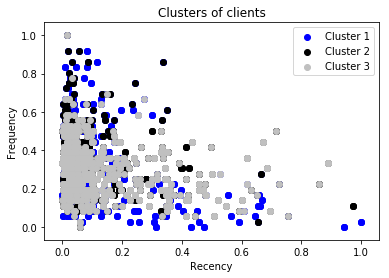

In [118]:
c1 = train_clust[train_clust.clusters == 0]
c2 = train_clust[train_clust.clusters == 1]
c3 = train_clust[train_clust.clusters == 2]

plt.scatter(c1.Recency, c1.Frequency, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.Recency, c2.Frequency, c = 'black', label = 'Cluster 2')
plt.scatter(c3.Recency, c3.Frequency, c = 'silver', label = 'Cluster 3')

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()

####  Plotting the Frequency and monetary

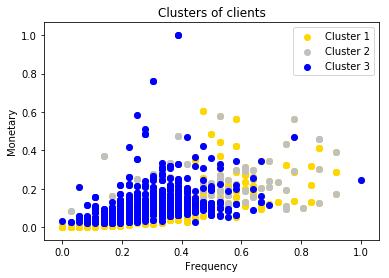

In [119]:
c1 = train_clust[train_clust.clusters == 0]
c2 = train_clust[train_clust.clusters == 1]
c3 = train_clust[train_clust.clusters == 2]

plt.scatter(c1.Frequency, c1.Monetary, c = 'gold', label = 'Cluster 1')
plt.scatter(c2.Frequency, c2.Monetary, c = 'silver', label = 'Cluster 2')
plt.scatter(c3.Frequency, c3.Monetary, c = 'blue', label = 'Cluster 3')

plt.title('Clusters of clients')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend()

#####  Plotting the recency and monetary

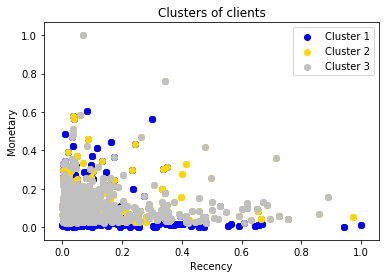

In [120]:
c1 = train_clust[train_clust.clusters == 0]
c2 = train_clust[train_clust.clusters == 1]
c3 = train_clust[train_clust.clusters == 2]

plt.scatter(c1.Recency, c1.Monetary, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.Recency, c2.Monetary, c = 'gold', label = 'Cluster 2')
plt.scatter(c3.Recency, c3.Monetary, c = 'silver', label = 'Cluster 3')

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend()

## Step-4 Model Building 

For Building model i will be using the original dataset along with the clusters numbers which i got it from clustering. I will not be using the dataset which i used it for clustering, as the preprocessing for clustering and model building are completely different.

First i will attach the target variable to my original dataset

In [121]:
train['Class'] = clusters

Printing the first 5 rows after attaching the target variable to the original dataset

In [122]:
train.head()

,CustomerID,recency,frequency,monetary,TotalQuantity,Age,gender_M,MaritalStatus_Yes,Familysize_2,Familysize_3,Familysize_4,Class
0,C12551,75,21,2888.5060,78,17.0,1,1,1,0,0,0
1,C12552,108,21,2181.4790,75,32.0,1,0,0,0,0,0
2,C12553,8,15,2456.6380,48,31.0,1,1,0,0,1,2
3,C12554,44,15,3832.3140,53,33.0,1,1,0,0,1,2
4,C12555,13,31,5478.0608,124,19.0,0,1,1,0,0,0


Checking the count of each class in target variable

In [123]:
train.Class.value_counts()

1    831
2    774
0    774
Name: Class, dtype: int64

Dropping 'CustomerID' for model building and also in test for predicting.

In [124]:
train.columns

Index(['CustomerID', 'recency', 'frequency', 'monetary', 'TotalQuantity',
       'Age', 'gender_M', 'MaritalStatus_Yes', 'Familysize_2', 'Familysize_3',
       'Familysize_4', 'Class'],
      dtype='object')

In [125]:
train = train.drop(['CustomerID',], axis=1)

Dropping 'gender_M','MaritalStatus_Yes', 'Familysize_2', 'Familysize_3', 'Familysize_4' from train and test.

In [133]:
train = train.drop(['gender_M','MaritalStatus_Yes', 'Familysize_2', 'Familysize_3', 'Familysize_4',], axis=1)

In [134]:
train.head()

,recency,frequency,monetary,TotalQuantity,Age,Class
0,75,21,2888.5060,78,17.0,0
1,108,21,2181.4790,75,32.0,0
2,8,15,2456.6380,48,31.0,2
3,44,15,3832.3140,53,33.0,2
4,13,31,5478.0608,124,19.0,0


In [135]:
test = test.drop(['CustomerID','gender_M',
       'MaritalStatus_Yes', 'Familysize_2', 'Familysize_3', 'Familysize_4',], axis=1)

Now the dataset is ready for model building

In [136]:
X = train.drop('Class', axis=1)  
Y = train['Class']

Splitting the train dataset into train and validation. validation will have 20% of the actual train data

In [137]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [138]:
# Model Building
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Predicting on validation

In [139]:
y_pred = classifier.predict(X_test)

In [140]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[138  10   5]
 [ 21  68  79]
 [ 10  75  70]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       153
           1       0.44      0.40      0.42       168
           2       0.45      0.45      0.45       155

   micro avg       0.58      0.58      0.58       476
   macro avg       0.57      0.59      0.58       476
weighted avg       0.57      0.58      0.57       476



In [141]:
#Calculating the accuracy on validation
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5798319327731093

### Predicting on test data 

In [142]:
test_predictions = classifier.predict(test)

In [143]:
test_predictions

array([2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1, 1,
       2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 0, 0, 0, 2, 2,
       0, 0, 0, 2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2,
       0, 0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0,
       2, 0, 2, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 0, 2, 2, 2, 1, 0, 1, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 1, 1, 2, 1,
       0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 1, 2, 1, 2, 1, 1,
       2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0,
       1, 2, 0, 1, 0, 0, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2,
       2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2,
       0, 2, 2, 1, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 1,
       1, 2, 0, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 2,

### Plotting the decison tree 

In [144]:
from sklearn import tree

import graphviz

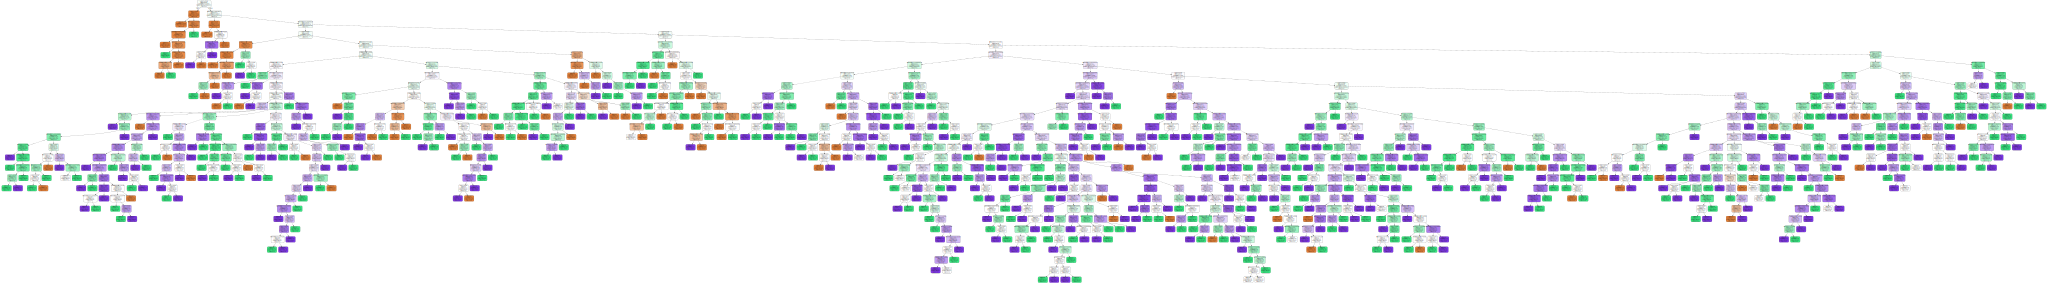

In [145]:
feature_names = X.columns
class_names= ['0','1','2']
dot_data = tree.export_graphviz(classifier, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(dot_data)  
graph